In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [5]:
train_X=np.loadtxt('/content/drive/MyDrive/Project/Dataset/train_input.csv',delimiter=",")
train_Y=np.loadtxt('/content/drive/MyDrive/Project/Dataset/train_labels.csv')
test_X=np.loadtxt('/content/drive/MyDrive/Project/Dataset/test_input.csv',delimiter=",")
test_Y=np.loadtxt('/content/drive/MyDrive/Project/Dataset/test_labels.csv')

In [6]:
train_X=train_X.reshape(10000,48,48,1)
train_Y=train_Y.reshape(10000,1)
test_X=test_X.reshape(2000,48,48,1)
test_Y=test_Y.reshape(2000,1)

In [7]:
train_X=train_X/255
test_X=test_X/255

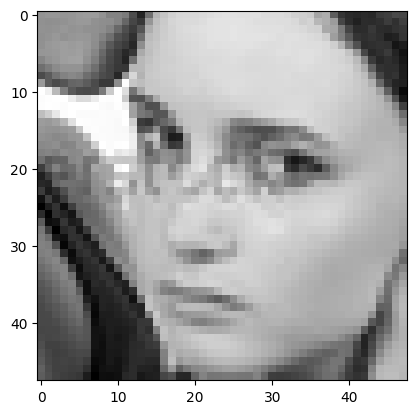

In [8]:
train_index=random.randint(0,9999)
plt.imshow(train_X[train_index,:],cmap='gray')
plt.show()

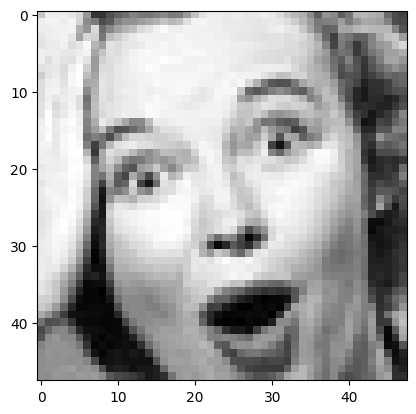

In [9]:
test_index=random.randint(0,1999)
plt.imshow(test_X[test_index,:],cmap='gray')
plt.show()

In [10]:
from keras.models import Sequential
from keras.layers import Activation,Dropout,Conv2D,Dense
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [11]:
model=Sequential()
model.add(Conv2D(filters=16, kernel_size=(7, 7), padding='same', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=16, kernel_size=(7, 7), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=96, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))


model.add(Flatten())
model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 16)        800       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 16)        12560     
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 16)       64        
 hNormalization)                                                 
                                                                 
 activation (Activation)     (None, 48, 48, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 16)       0

In [12]:
model.save('/content/drive/MyDrive/stress_mini_project/Project/model/cnn_stress_model1.h5')

In [13]:
from keras.models import load_model
loaded_model=load_model('/content/drive/MyDrive/stress_mini_project/Project/model/cnn_stress_model1.h5')

In [14]:
cnn_acc=loaded_model.evaluate(test_X,test_Y)[1]
print("CNN Accuracy:",cnn_acc)

63/63 [==============================] - 12s 185ms/step - loss: 0.6934 - accuracy: 0.4990
CNN Accuracy: 0.49900001287460327


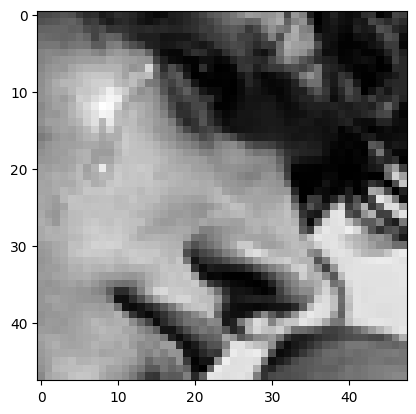

1/1 [==============================] - 0s 284ms/step
[[0.5017589]]

 stress Person 




In [15]:
index=random.randint(0,1999)
plt.imshow(test_X[index,:],cmap='gray')
plt.show()
prediction=loaded_model.predict(test_X[index,:].reshape(1,48,48,1))
print(prediction)
prediction=prediction>0.5
if prediction==1:
  print("\n stress Person \n\n")
else:
  print("\n Non-stress Person \n\n")

In [16]:

y_pred = loaded_model.predict(test_X)>0.5

63/63 [==============================] - 10s 161ms/step


In [17]:
# Calculate precision, recall, and F1 score
precision = precision_score(test_Y, y_pred, average='weighted')
recall = recall_score(test_Y, y_pred, average='weighted')
f1 = f1_score(test_Y, y_pred, average='weighted')

# Print the results
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 score: {:.3f}".format(f1))

Precision: 0.250
Recall: 0.499
F1 score: 0.333


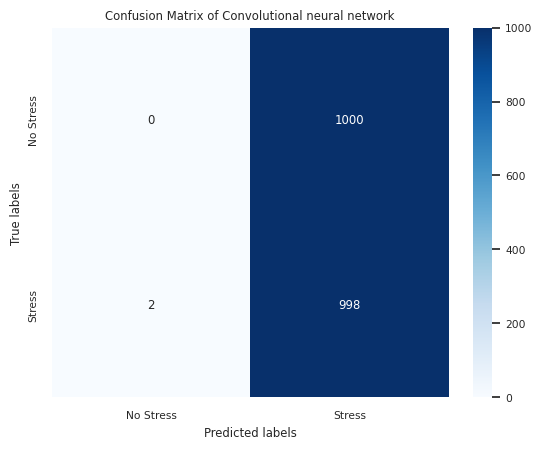

In [18]:
import seaborn as sns
# Compute the confusion matrix
cm = confusion_matrix(test_Y, y_pred, labels=[0, 1])

# Visualize confusion matrix using heatmap
sns.set(font_scale=0.7)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of Convolutional neural network')
# Fix x and y axis tick labels
tick_labels = ['No Stress', 'Stress']
plt.xticks(np.arange(len(tick_labels))+0.5, tick_labels)
plt.yticks(np.arange(len(tick_labels))+0.5, tick_labels)

plt.show()

In [19]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [20]:
def js_to_image(js_reply):
  image_bytes = b64decode(js_reply.split(',')[1])
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  img = cv2.imdecode(jpg_as_np, flags=1)
  return img
def bbox_to_bytes(bbox_array):
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  bbox_PIL.save(iobuf, format='png')
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))
  return bbox_bytes


In [21]:
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [22]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  img = js_to_image(data)
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  faces = face_cascade.detectMultiScale(gray)
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  cv2.imwrite(filename, img)

  return filename


<IPython.core.display.Javascript object>

Saved to /content/photo.jpg


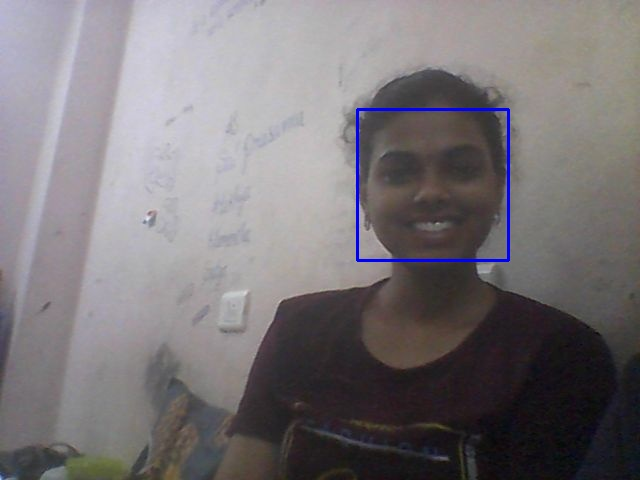

In [23]:
try:
  filename = take_photo('/content/photo.jpg')
  print('Saved to {}'.format(filename))
  display(Image(filename))
except Exception as err:
  print(str(err))

In [24]:
import cv2

In [25]:
#frame=cv2.imread("/content/DSC_0461.JPG")
frame=cv2.imread("/content/photo.jpg")

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [26]:
new=gray/255

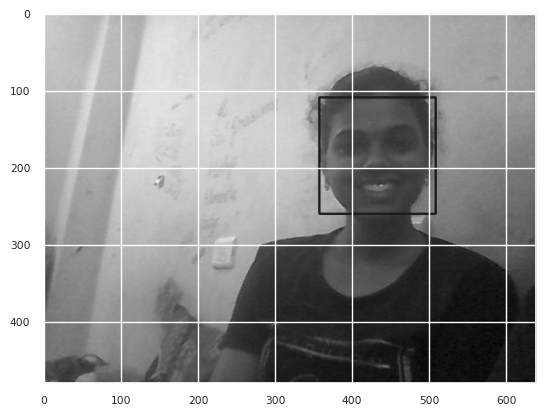

1/1 [==============================] - 0s 29ms/step
[[0.50448394]]

 Stress Person 




In [27]:
import matplotlib.pyplot as plt
plt.imshow(new, cmap='gray')
plt.show()

new_resized = cv2.resize(new, (48, 48), interpolation=cv2.INTER_LINEAR)
new = np.reshape(new_resized, (1, 48, 48, 1))

prediction = loaded_model.predict(new)
print(prediction)

prediction = prediction > 0.5
if prediction > 0.5:
    print("\n Stress Person \n\n")
else:
    print("\n Non-Stress Person \n\n")

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [29]:
train_X=train_X.reshape(10000,48*48*1)
train_Y=train_Y.reshape(10000,1)
test_X=test_X.reshape(2000,48*48*1)
test_Y=test_Y.reshape(2000,1)

In [30]:
DTC = DecisionTreeClassifier()
DTC.fit(train_X, train_Y)

DecisionTreeClassifier()

In [31]:
y_pred = DTC.predict(test_X)
DTC_ACC=accuracy_score(test_Y, y_pred)
print("Decision Tree Accuracy:",DTC_ACC)

Decision Tree Accuracy: 0.7295


In [32]:
# Calculate precision, recall, and F1 score
precision_D = precision_score(test_Y, y_pred, average='weighted')
recall_D = recall_score(test_Y, y_pred, average='weighted')
f1_D = f1_score(test_Y, y_pred, average='weighted')

# Print the results
print("Precision: {:.3f}".format(precision_D))
print("Recall: {:.3f}".format(recall_D))
print("F1 score: {:.3f}".format(f1_D))

Precision: 0.732
Recall: 0.730
F1 score: 0.729


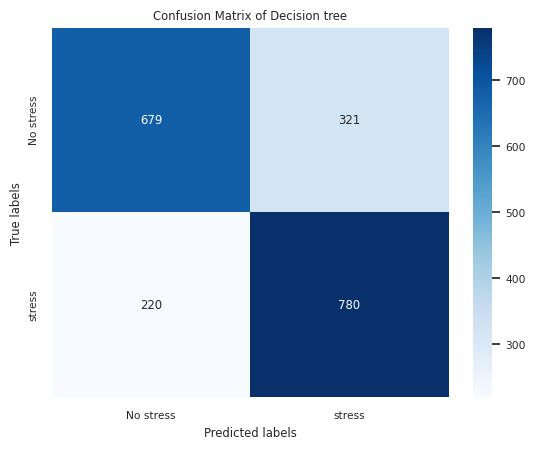

In [33]:
import seaborn as sns
# Compute the confusion matrix
cm = confusion_matrix(test_Y, y_pred, labels=[0, 1])

# Visualize confusion matrix using heatmap
sns.set(font_scale=0.7)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of Decision tree')
# Fix x and y axis tick labels
tick_labels = ['No stress', 'stress']
plt.xticks(np.arange(len(tick_labels))+0.5, tick_labels)
plt.yticks(np.arange(len(tick_labels))+0.5, tick_labels)

plt.show()

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [35]:
RFC = RandomForestClassifier(n_estimators=100, random_state=42)
RFC.fit(train_X, np.ravel(train_Y))

RandomForestClassifier(random_state=42)

In [36]:
y_pred = RFC.predict(test_X)
RFC_acc=accuracy_score(test_Y, y_pred)
print("Random Forest Accuracy:",RFC_acc)

Random Forest Accuracy: 0.799


In [37]:
# Calculate precision, recall, and F1 score
precision_r = precision_score(test_Y, y_pred, average='weighted')
recall_r = recall_score(test_Y, y_pred, average='weighted')
f1_r = f1_score(test_Y, y_pred, average='weighted')

# Print the results
print("Precision: {:.3f}".format(precision_r))
print("Recall: {:.3f}".format(recall_r))
print("F1 score: {:.3f}".format(f1_r))

Precision: 0.800
Recall: 0.799
F1 score: 0.799


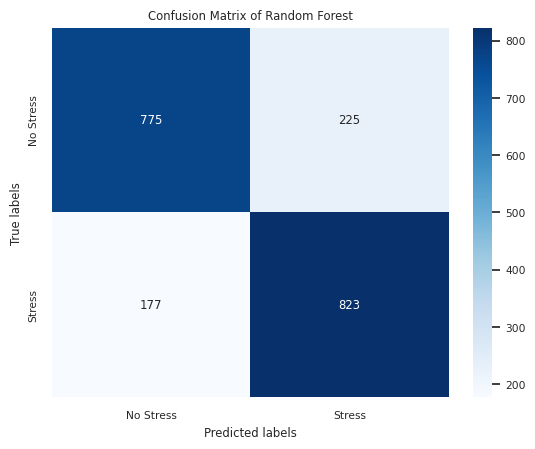

In [38]:
import seaborn as sns
# Compute the confusion matrix
cm = confusion_matrix(test_Y, y_pred, labels=[0, 1])

# Visualize confusion matrix using heatmap
sns.set(font_scale=0.7)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of Random Forest')
# Fix x and y axis tick labels
tick_labels = ['No Stress', 'Stress']
plt.xticks(np.arange(len(tick_labels))+0.5, tick_labels)
plt.yticks(np.arange(len(tick_labels))+0.5, tick_labels)

plt.show()

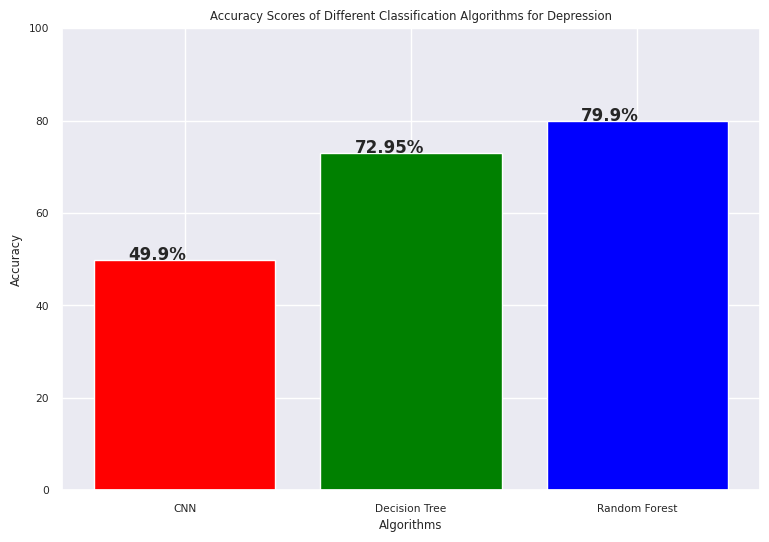

In [39]:
data = [[RFC_acc,"Random Forest"],[DTC_ACC,"Decision Tree"],[cnn_acc,"CNN"]]
data.sort()
labels=list(zip(*data))[1]
acc_scores=list(zip(*data))[0]
acc_scores=[i*100 for i in acc_scores]
plt.figure(figsize=(9, 6))
plt.bar(labels, acc_scores, color=['red', 'green', 'blue','yellow','orange','purple','cyan'])
plt.title('Accuracy Scores of Different Classification Algorithms for Depression')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.ylim((0,100))
for i, v in enumerate(acc_scores):
    plt.text(i-0.25, v+0.02, str(round(v, 3))+"%", fontweight='bold',fontsize=12)
plt.show()